#### Primera Rama: Carga y Visualización Inicial de Datos (Archivo Excel)

In [42]:
# Importar bibliotecas necesarias
import pandas as pd

# Paso 1: Cargar los datos desde un archivo Excel
# Ruta del archivo (reemplazar con la ruta real del archivo a analizar)
file_path = "data/Bank_Clients_v2.xlsx"

# Leer los datos en un DataFrame
try:
    data = pd.read_excel(file_path, index_col=0)
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    raise Exception(f"El archivo en la ruta {file_path} no fue encontrado.")
except ValueError:
    raise Exception("Error al leer el archivo Excel. Verifica el formato del archivo.")

# Paso 2: Crear una tabla de datos
# Mostrar información básica del dataset para validación inicial
print("\nInformación general del dataset:")
print(data.info())

# Vista previa de las primeras filas de los datos
print("\nPrimeras filas del dataset:")
print(data.head())

# Validación de datos cargados (recuento de valores nulos y tipos de datos)
print("\nValidación inicial de los datos:")
print("Cantidad de valores nulos por columna:")
print(data.isnull().sum())


Datos cargados exitosamente.

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB
None

Primeras filas del dataset:
    Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
ID                                                                             
1    67    male    2     own             NaN           little           1169   
2    


Columnas numéricas seleccionadas:
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

Matriz de correlación:
                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


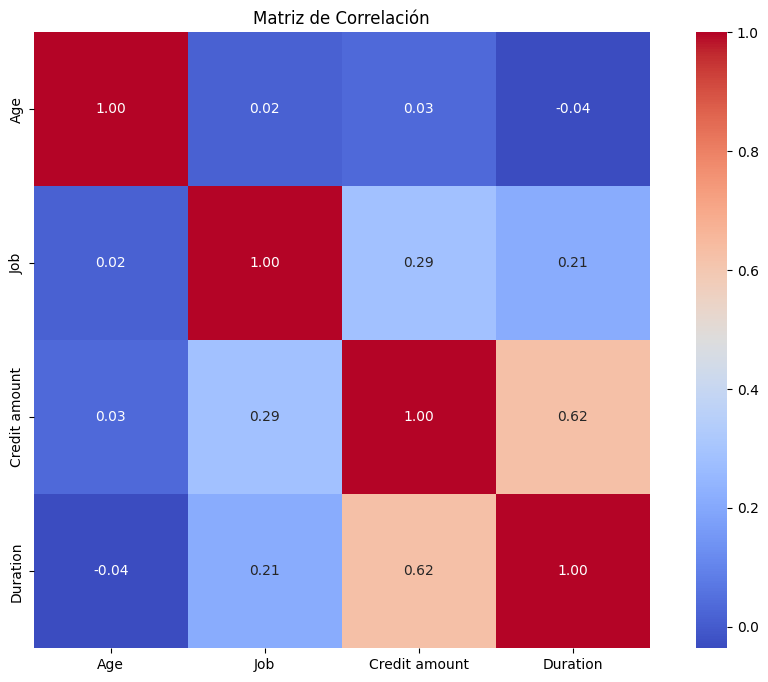

In [43]:
# Paso 3: Seleccionar únicamente las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

# Verificar las columnas numéricas seleccionadas
print("\nColumnas numéricas seleccionadas:")
print(numerical_data.columns)

# Calcular la matriz de correlación para las columnas numéricas
print("\nMatriz de correlación:")
correlation_matrix = numerical_data.corr()  # Calcular correlación solo para datos numéricos
print(correlation_matrix)

# Paso 4: Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlación")
plt.show()


#### Análisis de Correlación Categórica-Numerical

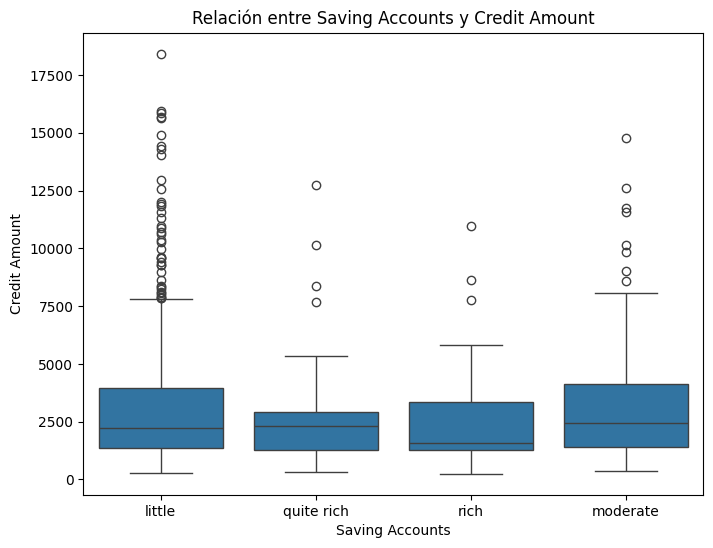

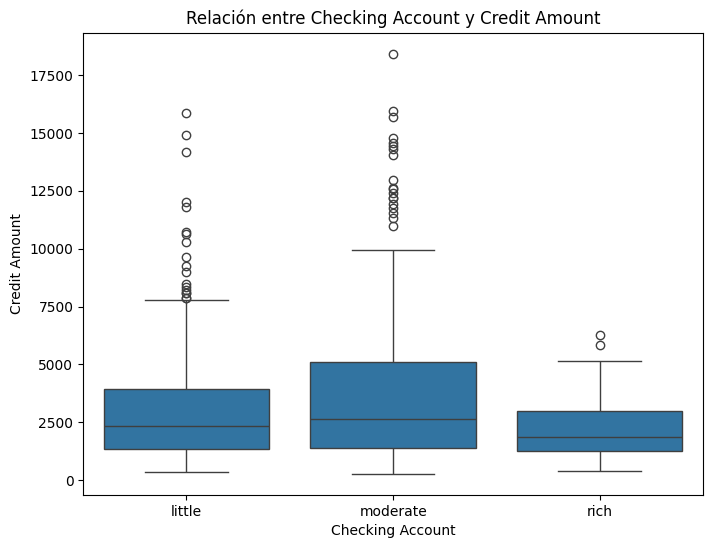

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar Saving accounts vs Credit amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Saving accounts'], y=data['Credit amount'])
plt.title('Relación entre Saving Accounts y Credit Amount')
plt.xlabel('Saving Accounts')
plt.ylabel('Credit Amount')
plt.show()

# Comparar Checking account vs Credit amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Checking account'], y=data['Credit amount'])
plt.title('Relación entre Checking Account y Credit Amount')
plt.xlabel('Checking Account')
plt.ylabel('Credit Amount')
plt.show()


#### Prueba Estadística (ANOVA o Kruskal-Wallis)

In [45]:
from scipy.stats import f_oneway

# ANOVA para Saving accounts vs Credit amount
anova_result_saving = f_oneway(
    *[data[data['Saving accounts'] == cat]['Credit amount'] for cat in data['Saving accounts'].dropna().unique()]
)
print("ANOVA (Saving Accounts vs Credit Amount):")
print(f"F-statistic: {anova_result_saving.statistic:.2f}, p-value: {anova_result_saving.pvalue:.4f}")

# ANOVA para Checking account vs Credit amount
anova_result_checking = f_oneway(
    *[data[data['Checking account'] == cat]['Credit amount'] for cat in data['Checking account'].dropna().unique()]
)
print("\nANOVA (Checking Account vs Credit Amount):")
print(f"F-statistic: {anova_result_checking.statistic:.2f}, p-value: {anova_result_checking.pvalue:.4f}")


ANOVA (Saving Accounts vs Credit Amount):
F-statistic: 1.93, p-value: 0.1226

ANOVA (Checking Account vs Credit Amount):
F-statistic: 9.01, p-value: 0.0001


#### antes de la regresion

In [46]:
# Convertir todas las variables categóricas a dummies
data_encoded = pd.get_dummies(data, drop_first=True)

# Verificar las columnas después de codificar
print("\nColumnas después de codificar las categóricas:")
print(data_encoded.columns)

# Confirmar que todas las columnas son numéricas
print("\nTipos de datos después de codificar:")
print(data_encoded.dtypes)



Columnas después de codificar las categóricas:
Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

Tipos de datos después de codificar:
Age                            int64
Job                            int64
Credit amount                  int64
Duration                       int64
Sex_male                        bool
Housing_own                     bool
Housing_rent                    bool
Saving accounts_moderate        bool
Saving accounts_quite rich      bool
Saving accounts_rich            bool
Checking account_moderate       bool
Checking account_rich           bool
Purpose_car 

In [47]:
# Separar las variables independientes (X) y dependiente (y)
X = data_encoded.drop(['Credit amount'], axis=1)  # Variables independientes
y = data_encoded['Credit amount']  # Variable dependiente

# Confirmar las primeras filas de X e y
print("\nPrimeras filas de las variables independientes (X):")
print(X.head())

print("\nPrimeras filas de la variable dependiente (y):")
print(y.head())



Primeras filas de las variables independientes (X):
    Age  Job  Duration  Sex_male  Housing_own  Housing_rent  \
ID                                                            
1    67    2         6      True         True         False   
2    22    2        48     False         True         False   
3    49    1        12      True         True         False   
4    45    2        42      True        False         False   
5    53    2        24      True        False         False   

    Saving accounts_moderate  Saving accounts_quite rich  \
ID                                                         
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   
5                      False                       False   

    Saving accounts_rich  Checking account_moderate  Checking account_rich  \
ID    

In [48]:
# Convertir todas las columnas a tipo float
X = X.astype(float)
y = y.astype(float)


#### Regresión Lineal

In [49]:
import statsmodels.api as sm

# Agregar un intercepto (constante) a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print("\nResumen del modelo de regresión:")
print(model.summary())



Resumen del modelo de regresión:
                            OLS Regression Results                            
Dep. Variable:          Credit amount   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     47.89
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          9.69e-121
Time:                        13:24:35   Log-Likelihood:                -9048.6
No. Observations:                1000   AIC:                         1.814e+04
Df Residuals:                     981   BIC:                         1.823e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### Visualización de Relación Conjunta

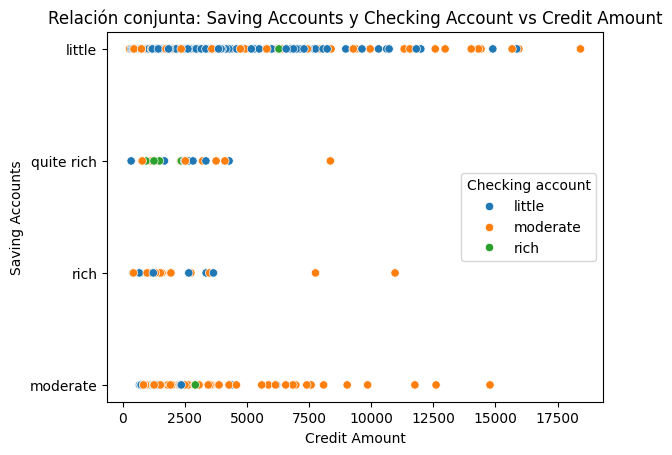

In [50]:
# Visualizar Saving accounts, Checking account vs Credit amount
sns.scatterplot(x=data['Credit amount'], y=data['Saving accounts'], hue=data['Checking account'])
plt.title('Relación conjunta: Saving Accounts y Checking Account vs Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Saving Accounts')
plt.show()


### BRUNCH 2


Distribución de frecuencias para la columna 'Sex':
Sex
male      690
female    310
Name: count, dtype: int64


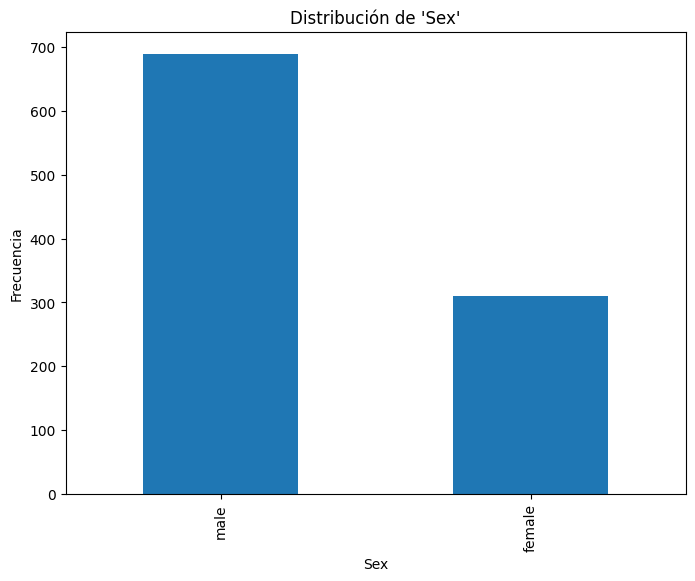


Distribución de frecuencias para la columna 'Housing':
Housing
own     713
rent    179
free    108
Name: count, dtype: int64


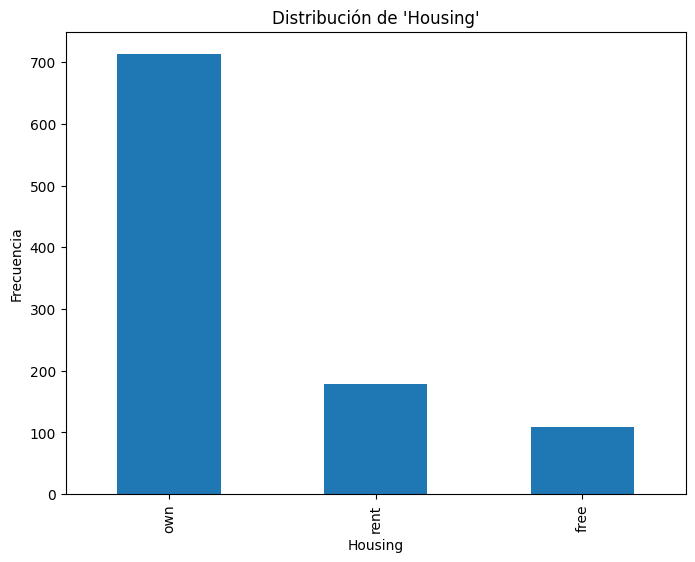


Distribución de frecuencias para la columna 'Saving accounts':
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


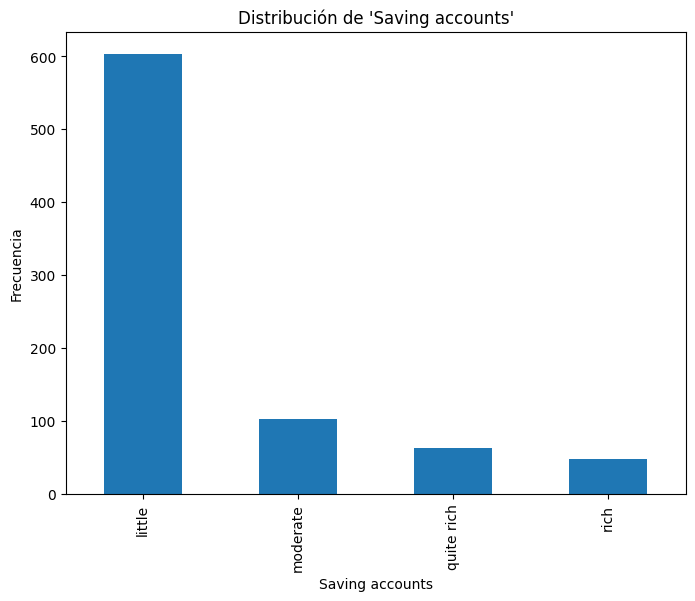


Distribución de frecuencias para la columna 'Checking account':
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


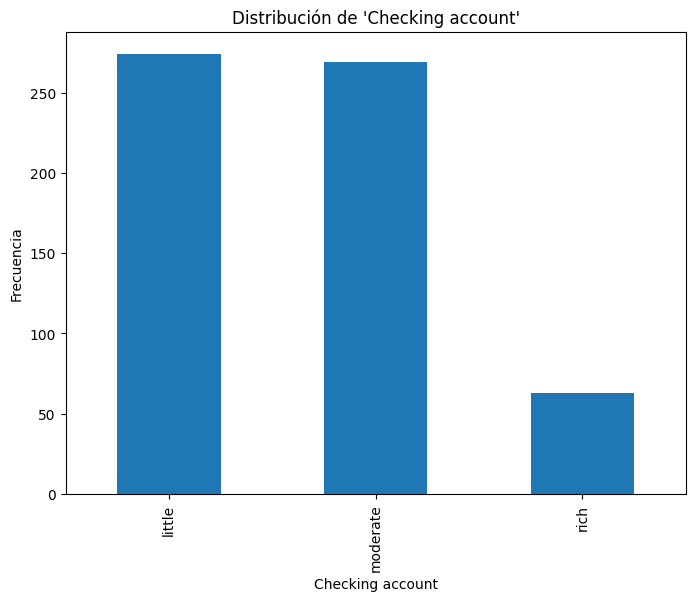


Distribución de frecuencias para la columna 'Purpose':
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


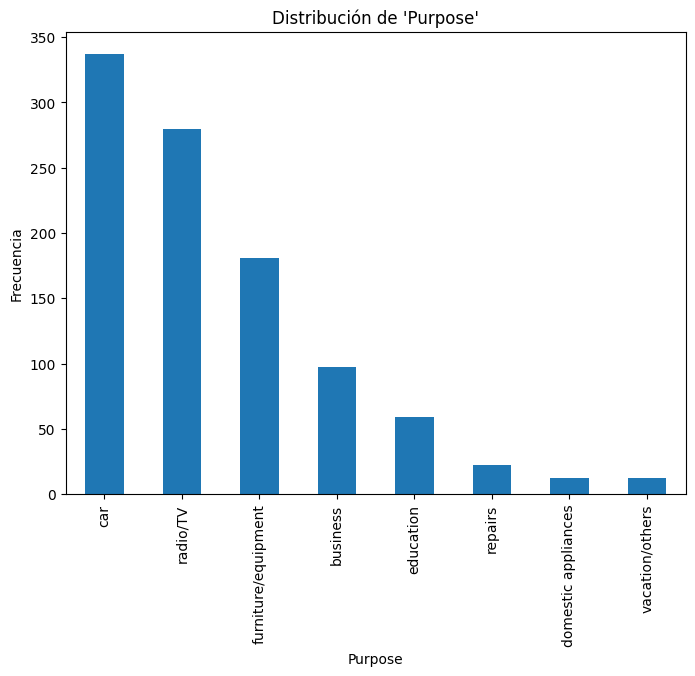

In [51]:
# Calcular la distribución de frecuencias para las variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"\nDistribución de frecuencias para la columna '{column}':")
    print(data[column].value_counts())

    # Visualizar la distribución con un gráfico de barras
    data[column].value_counts().plot(kind='bar', figsize=(8, 6), title=f"Distribución de '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()



Estadísticas descriptivas para la columna 'Age':
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64


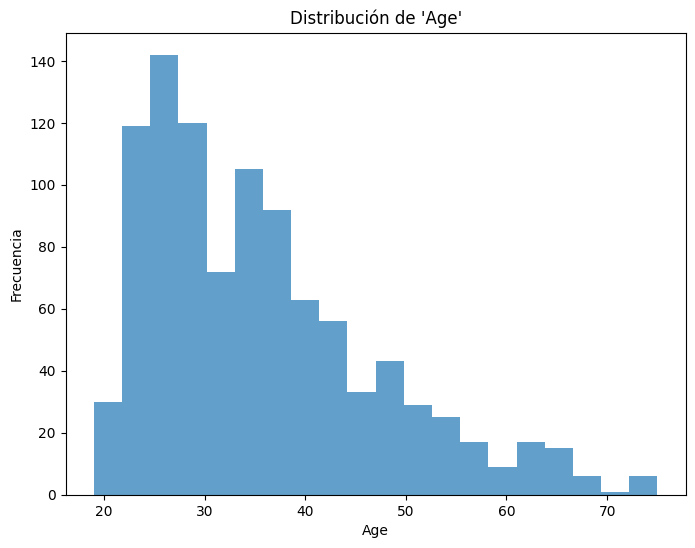


Estadísticas descriptivas para la columna 'Job':
count    1000.000000
mean        1.904000
std         0.653614
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Job, dtype: float64


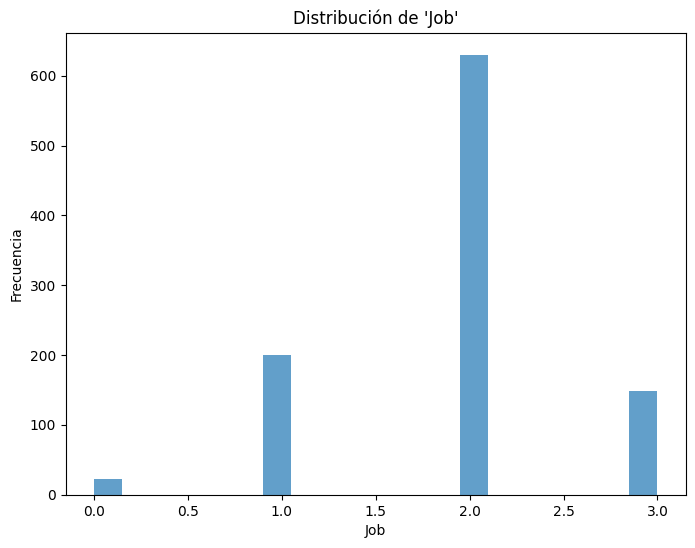


Estadísticas descriptivas para la columna 'Credit amount':
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64


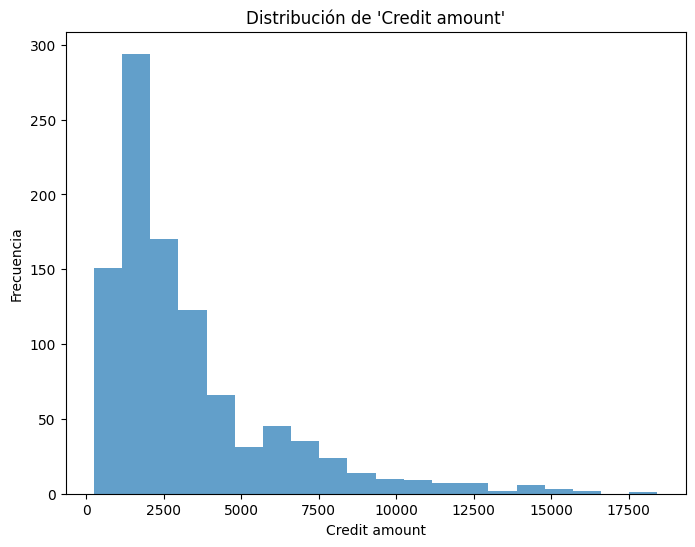


Estadísticas descriptivas para la columna 'Duration':
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64


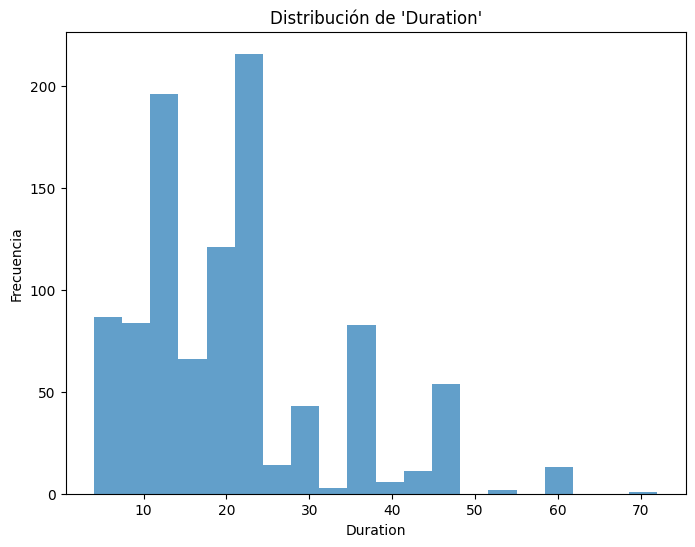

In [52]:
# Calcular y visualizar la distribución para variables numéricas
numerical_columns = data.select_dtypes(include=['number']).columns

for column in numerical_columns:
    print(f"\nEstadísticas descriptivas para la columna '{column}':")
    print(data[column].describe())

    # Visualizar la distribución con un histograma
    data[column].plot(kind='hist', bins=20, figsize=(8, 6), title=f"Distribución de '{column}'", alpha=0.7)
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()


## BRUNCH 3

In [53]:
# Verificar tipos de datos en X_clustering
print("\nTipos de datos en el dataset:")
print(X_clustering.dtypes)

# Si existen columnas categóricas no codificadas, las mostramos
categorical_columns = X_clustering.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nColumnas categóricas detectadas (requieren codificación):")
    print(categorical_columns)



Tipos de datos en el dataset:
Age                            int64
Job                            int64
Credit amount                  int64
Duration                       int64
Saving accounts_moderate        bool
Saving accounts_quite rich      bool
Saving accounts_rich            bool
Checking account_moderate       bool
Checking account_rich           bool
Sex_male                        bool
Housing_own                     bool
Housing_rent                    bool
Purpose_car                     bool
Purpose_domestic appliances     bool
Purpose_education               bool
Purpose_furniture/equipment     bool
Purpose_radio/TV                bool
Purpose_repairs                 bool
Purpose_vacation/others         bool
Cluster                        int32
dtype: object


In [54]:
# Codificar columnas categóricas si es necesario
X_clustering = pd.get_dummies(X_clustering, drop_first=True)

# Verificar nuevamente los tipos de datos
print("\nColumnas después de codificación:")
print(X_clustering.dtypes)



Columnas después de codificación:
Age                            int64
Job                            int64
Credit amount                  int64
Duration                       int64
Saving accounts_moderate        bool
Saving accounts_quite rich      bool
Saving accounts_rich            bool
Checking account_moderate       bool
Checking account_rich           bool
Sex_male                        bool
Housing_own                     bool
Housing_rent                    bool
Purpose_car                     bool
Purpose_domestic appliances     bool
Purpose_education               bool
Purpose_furniture/equipment     bool
Purpose_radio/TV                bool
Purpose_repairs                 bool
Purpose_vacation/others         bool
Cluster                        int32
dtype: object


In [55]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Mostrar las primeras filas de los datos escalados
print("\nDatos estandarizados listos para clustering:")
print(X_scaled[:5])



Datos estandarizados listos para clustering:
[[ 2.76645648  0.14694918 -0.74513141 -1.23647786 -0.33886163 -0.25929878
  -0.22454436 -0.60662102 -0.25929878  0.67028006  0.63444822 -0.4669334
  -0.71294854 -0.11020775 -0.2503982  -0.47010767  1.60356745 -0.14998296
  -0.11020775 -0.93145824]
 [-1.19140394  0.14694918  0.94981679  2.24819436 -0.33886163 -0.25929878
  -0.22454436  1.6484757  -0.25929878 -1.49191369  0.63444822 -0.4669334
  -0.71294854 -0.11020775 -0.2503982  -0.47010767  1.60356745 -0.14998296
  -0.11020775  0.1708592 ]
 [ 1.18331231 -1.38377145 -0.41656241 -0.73866754 -0.33886163 -0.25929878
  -0.22454436 -0.60662102 -0.25929878  0.67028006  0.63444822 -0.4669334
  -0.71294854 -0.11020775  3.99363901 -0.47010767 -0.62360956 -0.14998296
  -0.11020775 -0.93145824]
 [ 0.8315025   0.14694918  1.63424694  1.75038404 -0.33886163 -0.25929878
  -0.22454436 -0.60662102 -0.25929878  0.67028006 -1.57617276 -0.4669334
  -0.71294854 -0.11020775 -0.2503982   2.12717227 -0.62360956 -

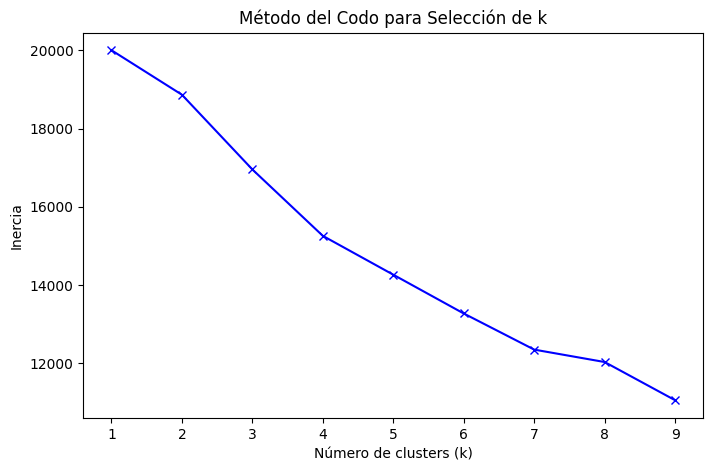

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de k')
plt.show()


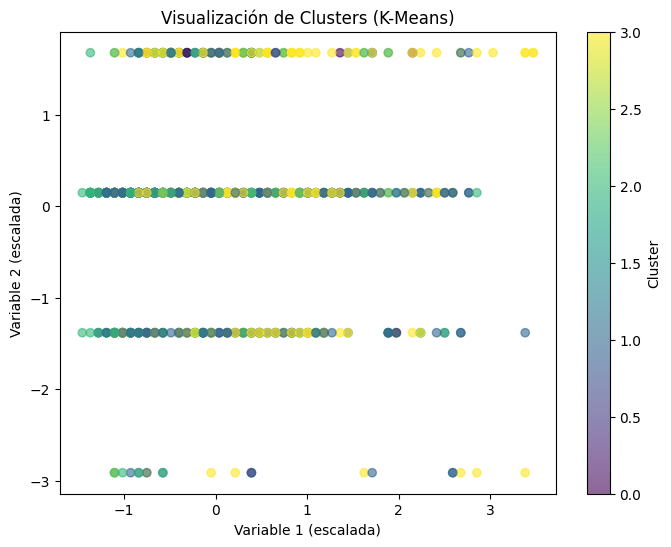

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("Visualización de Clusters (K-Means)")
plt.xlabel("Variable 1 (escalada)")
plt.ylabel("Variable 2 (escalada)")
plt.colorbar(label="Cluster")
plt.show()


### CON EL PCA DONE


Varianza explicada acumulada por los componentes principales:
Con 1 componentes principales se explica el 14.95% de la varianza.
Con 2 componentes principales se explica el 25.21% de la varianza.
Con 3 componentes principales se explica el 33.83% de la varianza.
Con 4 componentes principales se explica el 40.05% de la varianza.
Con 5 componentes principales se explica el 46.02% de la varianza.
Con 6 componentes principales se explica el 51.62% de la varianza.
Con 7 componentes principales se explica el 56.74% de la varianza.
Con 8 componentes principales se explica el 61.83% de la varianza.
Con 9 componentes principales se explica el 66.62% de la varianza.
Con 10 componentes principales se explica el 71.39% de la varianza.
Con 11 componentes principales se explica el 75.96% de la varianza.
Con 12 componentes principales se explica el 80.21% de la varianza.
Con 13 componentes principales se explica el 84.29% de la varianza.
Con 14 componentes principales se explica el 88.16% de la vari

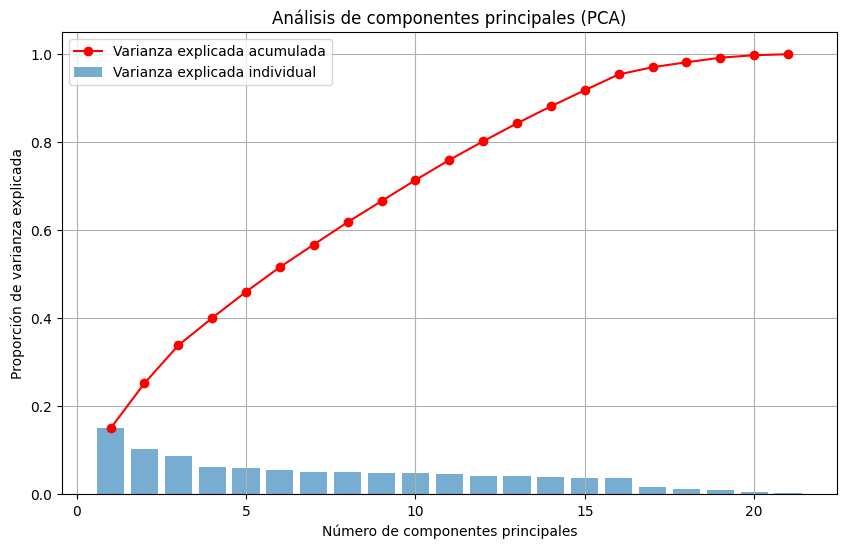

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Aplicar PCA sin limitar el número de componentes
pca_full = PCA()
pca_full.fit(X_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

# Imprimir la varianza explicada acumulada
print("\nVarianza explicada acumulada por los componentes principales:")
for i, var in enumerate(explained_variance_cumsum):
    print(f"Con {i+1} componentes principales se explica el {var:.2%} de la varianza.")

# Graficar la varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumsum, marker='o', color='red', label='Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Análisis de componentes principales (PCA)')
plt.legend(loc='best')
plt.grid()
plt.show()



Datos transformados con PCA (primeras filas):
[[-1.93847875 -0.23256083 -1.55484155 -0.20932402  1.32663305  0.98094019
  -0.51096748  0.76856478  0.1333097   0.2102184   0.99258918  1.4562297
  -0.58499006 -0.2805752   1.43801748  0.0140653   0.39942659  0.36849378
   0.30667704  0.08284129]
 [-1.99402683  1.13378254  2.12932616 -1.44985844 -0.02229976 -1.0774033
  -0.32491395 -0.0572385   0.7874935  -0.99542142 -1.28110748 -1.37362283
  -0.30104745 -0.34698828  0.65373962  0.57878426 -0.60637153 -0.23498429
   0.05498969  0.28035942]
 [-1.35506359 -0.5446216  -1.07338479  0.56478572 -0.15135463  3.50744154
  -0.38605805 -1.67475201 -0.76365696 -1.55630345 -0.05919692  0.03169312
  -0.160409   -0.69295516 -0.54951346 -0.91354046  0.41681117  0.05318378
   0.39295791  0.21366127]
 [ 1.29309613  1.3504396   1.58670819  2.08075192  0.39337004 -0.07114114
   0.12720938  0.47009664 -1.04368938  0.1147577  -0.53667872  0.58168531
   0.21492017 -1.07618674  0.93794855 -0.64758435 -0.1480656

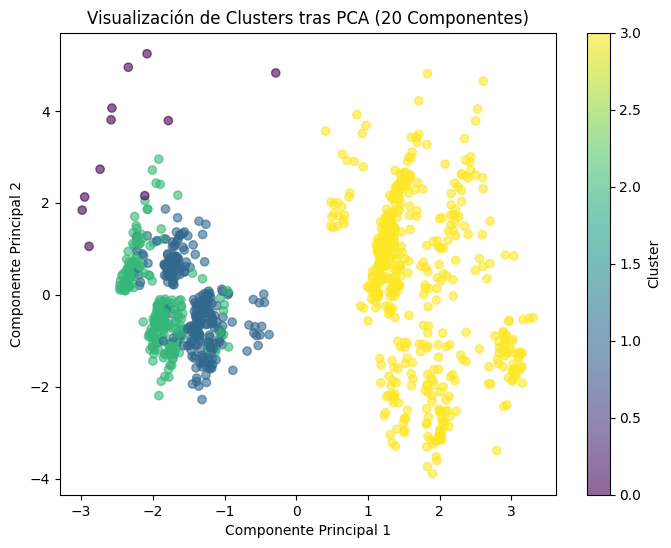

In [64]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Aplicar PCA con 20 componentes principales
n_components = 20
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Verificar los datos transformados
print("\nDatos transformados con PCA (primeras filas):")
print(X_pca[:5])

# Mostrar la varianza explicada por los 20 componentes principales
explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = pca.explained_variance_ratio_.cumsum()
print("\nVarianza explicada por cada componente principal (top 20):")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

# Aplicar K-Means sobre los datos transformados por PCA
n_clusters = 4  # Ajustar según análisis previo
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# Agregar las etiquetas de cluster al dataset original
X_clustering['Cluster_PCA'] = labels_pca

# Ver la distribución de observaciones por cluster
print("\nDistribución de observaciones por cluster (PCA):")
print(X_clustering['Cluster_PCA'].value_counts())

# Visualización de los clusters en los dos primeros componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.title("Visualización de Clusters tras PCA (20 Componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Aplicar PCA para reducir dimensionalidad
n_components = 2  # Puedes ajustar el número de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Verificar los datos transformados
print("\nDatos transformados con PCA (primeras filas):")
print(X_pca[:5])

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("\nVarianza explicada por los componentes principales:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")



Datos transformados con PCA (primeras filas):
[[-1.83708332 -0.99707813]
 [-0.77110695 -1.38565415]
 [-1.35633562 -0.17228565]
 [ 1.73363074 -0.42224107]
 [ 2.49360168 -0.23367147]]

Varianza explicada por los componentes principales:
Componente 1: 12.49%
Componente 2: 9.67%


In [61]:
from sklearn.cluster import KMeans

# Aplicar K-Means sobre los datos transformados por PCA
n_clusters = 4  # Ajustar según el análisis previo
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# Agregar las etiquetas de cluster al dataset original
X_clustering['Cluster_PCA'] = labels_pca

# Ver la distribución de observaciones por cluster
print("\nDistribución de observaciones por cluster (PCA):")
print(X_clustering['Cluster_PCA'].value_counts())



Distribución de observaciones por cluster (PCA):
Cluster_PCA
1    334
2    322
3    173
0    171
Name: count, dtype: int64


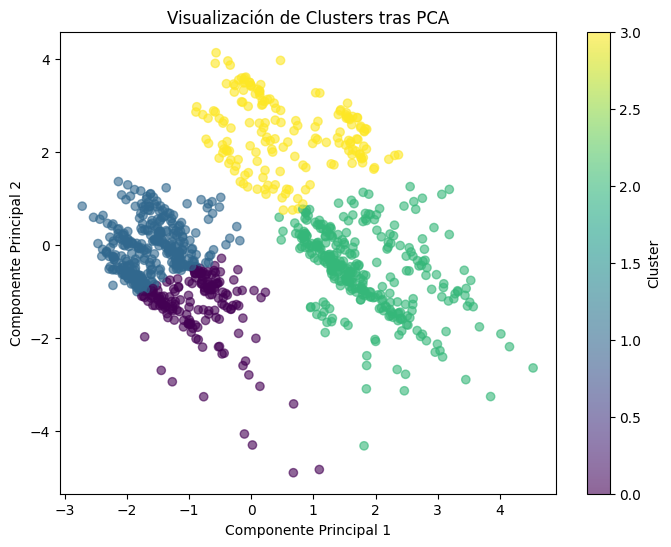

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.title("Visualización de Clusters tras PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()
